In [ ]:
from src.LogRegCCD import LogRegCCD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, f1_score, average_precision_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
def compare_model_metrics(ccd_results, sklearn_results, title='Performance Comparison: LogRegCCD vs sklearn'):
    """
    Creates a comparative bar chart for model metrics.
    
    Parameters:
    -----------
    ccd_results : dict or DataFrame
        Metrics for the CCD model. If dict, should contain metric names as keys and values as scores.
        If DataFrame, should have metrics in columns.
    sklearn_results : dict or DataFrame
        Metrics for the sklearn model. Same format as ccd_results.
    title : str, optional
        Plot title, default is 'Performance Comparison: LogRegCCD vs sklearn'
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """

    
    # Convert inputs to dictionaries if they're DataFrames
    if isinstance(ccd_results, pd.DataFrame):
        ccd_metrics = {
            'Balanced Accuracy': ccd_results['balanced_accuracy'].values[0],
            'ROC AUC': ccd_results['roc_auc'].values[0],
            'F1 Score': ccd_results['f1'].values[0],
            'PR AUC': ccd_results['pr_auc'].values[0]
        }
    else:
        ccd_metrics = ccd_results
        
    if isinstance(sklearn_results, pd.DataFrame):
        sklearn_metrics = {
            'Balanced Accuracy': sklearn_results['Balanced Accuracy'].values[0],
            'ROC AUC': sklearn_results['Roc_Auc'].values[0],
            'F1 Score': sklearn_results['F1'].values[0],
            'PR AUC': sklearn_results['PR_AUC'].values[0]
        }
    else:
        sklearn_metrics = sklearn_results

    # Create a dataframe for comparison
    comparison_df = pd.DataFrame({
        'Metric': list(ccd_metrics.keys()),
        'LogRegCCD': list(ccd_metrics.values()),
        'sklearn': list(sklearn_metrics.values())
    })

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set up bar positions
    x = np.arange(len(comparison_df['Metric']))
    width = 0.35

    # Create the bars
    ccd_bars = ax.bar(x - width/2, comparison_df['LogRegCCD'], width, label='LogRegCCD', color='skyblue')
    sklearn_bars = ax.bar(x + width/2, comparison_df['sklearn'], width, label='sklearn', color='lightcoral')

    # Add labels and title
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_df['Metric'])
    ax.legend()
    ax.set_ylim(0, 1)  # Set y-axis from 0 to 1 since these are all scores between 0 and 1

    # Add value labels on top of bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.3f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

    add_labels(ccd_bars)
    add_labels(sklearn_bars)

    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    return fig, ax



# Earthquake

In [31]:
data = pd.read_csv('data/earthquake_preprocessed.csv')
display(data.head())

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data['y'], test_size=0.2, random_state=2871, stratify=data['y'])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lambda_vals = np.logspace(-5, 1, 7)

# Fit the model
model = LogRegCCD(max_iter=100, lambda_vals=lambda_vals)
model.fit(X_train, y_train)
model.validate_all(X_test, y_test)

# Compare with sklearn's LogisticRegression
sklearn_model = LogisticRegression(max_iter=100, penalty='l1', solver='liblinear')
sklearn_model.fit(X_train, y_train)

,y,body,surface,new_col_0,new_col_1,new_col_2,new_col_3,new_col_4,new_col_5,new_col_6,...,new_col_10,new_col_11,new_col_12,new_col_13,new_col_14,new_col_15,new_col_16,new_col_17,new_col_18,new_col_19
0,0,5.60,4.25,4.952526,3.761873,1.881298,2.769271,4.554636,4.723829,1.752938,...,0.817072,1.363005,1.317405,3.507063,4.660591,5.519134,1.435977,0.832869,5.617340,5.541780
1,0,5.18,3.93,2.063088,3.957895,0.417504,4.846513,4.112686,4.248237,2.949588,...,0.257903,1.520456,1.130833,1.368327,2.825666,2.078076,1.334814,6.399329,3.684705,6.514204
2,0,6.31,6.30,1.860090,3.948091,3.885735,2.615489,4.749000,1.236741,1.961220,...,0.170888,1.191277,1.388039,3.285029,3.483254,2.081719,0.255848,1.428357,4.968425,8.297418
3,0,5.36,4.49,3.882065,0.456031,2.792021,3.146993,3.628598,2.252721,2.187375,...,0.668643,0.943152,0.904134,0.442527,4.612497,4.425007,3.304469,5.221969,3.925139,2.064213
4,0,5.96,6.39,1.704018,2.472102,2.121110,3.478743,3.067076,0.645797,4.520793,...,0.929376,0.823682,2.242828,3.385809,3.536193,2.713308,3.953888,1.905462,2.650192,0.109958


LogisticRegression(penalty='l1', solver='liblinear')

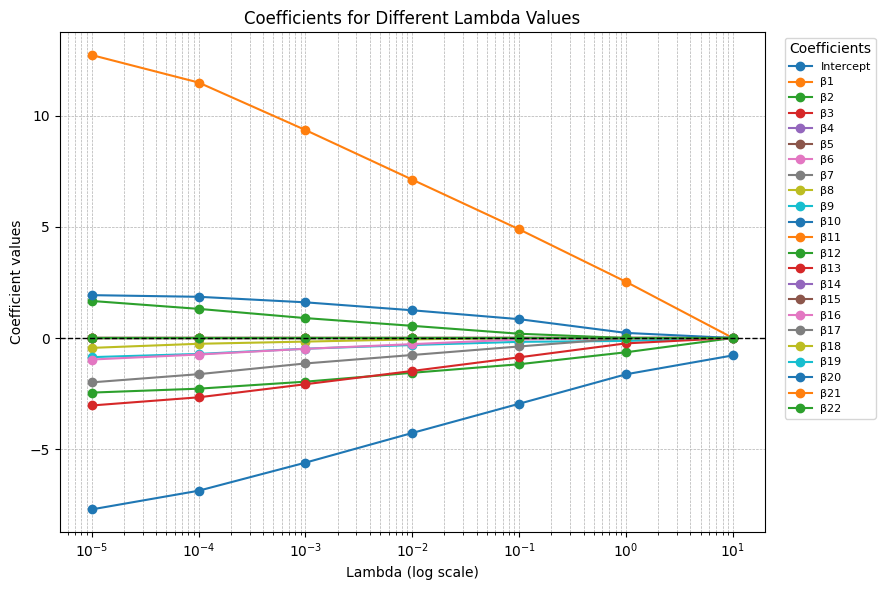

In [15]:
model.plot_coeff()

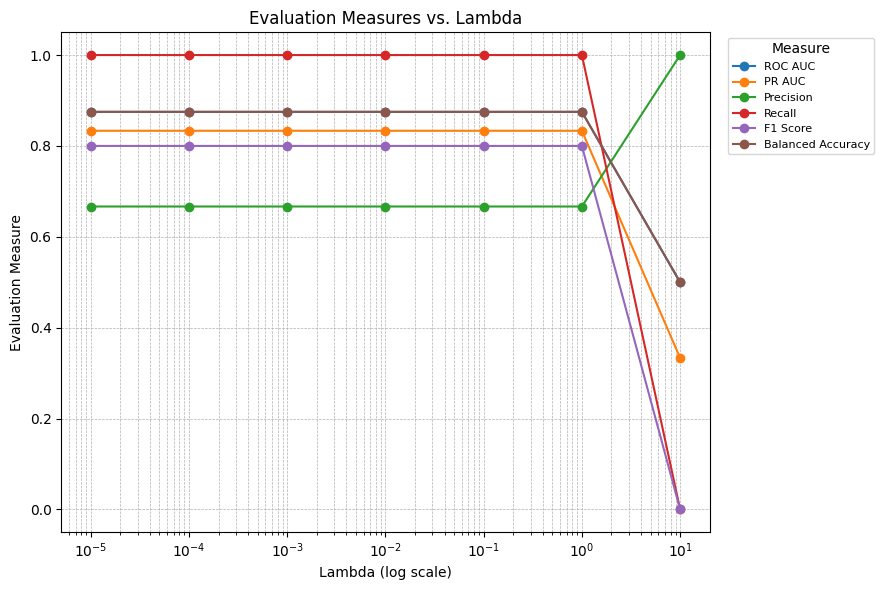

In [ ]:
model.validate_and_plot_all(X_test, y_test)

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot: title={'center': '(Earthquake) Performance Comparison: LogRegCCD vs sklearn'}, xlabel='Metrics', ylabel='Score'>)

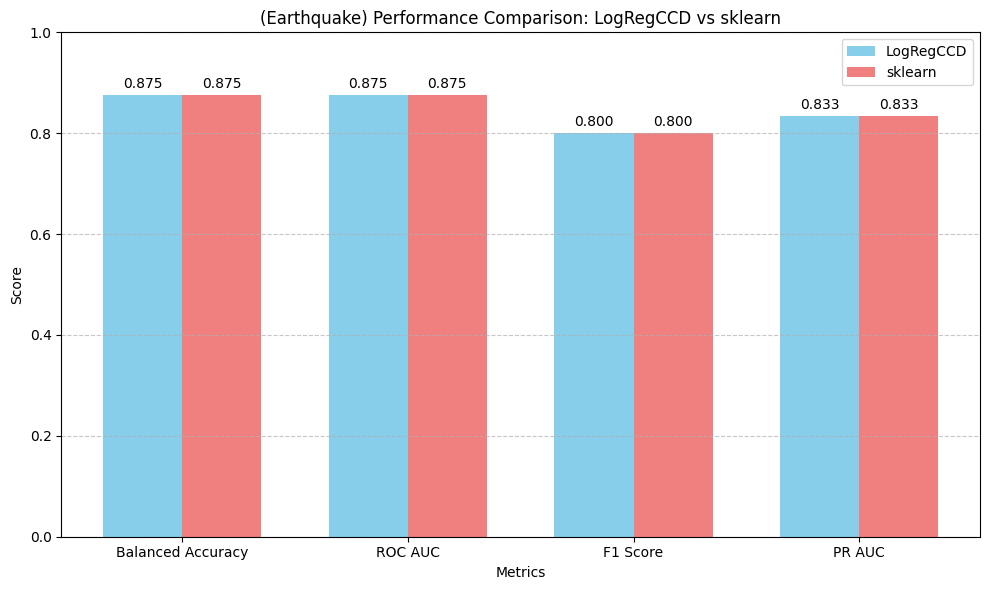

In [32]:
model.results = model.results.loc[model.results['lambda'] == 1]

# Compare with sklearn's LogisticRegression
y_pred = sklearn_model.predict(X_test)
y_pred_proba = sklearn_model.predict_proba(X_test)[:, 1]

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred_proba)

ccd_metrics = {
    'Balanced Accuracy': model.results['balanced_accuracy'].values[0],
    'ROC AUC': model.results['roc_auc'].values[0],
    'F1 Score': model.results['f1'].values[0],
    'PR AUC': model.results['pr_auc'].values[0]
}

# Calculate metrics for sklearn model
sklearn_metrics = {
    'Balanced Accuracy': balanced_accuracy,
    'ROC AUC': roc_auc,
    'F1 Score': f1,
    'PR AUC': pr_auc
}

compare_model_metrics(ccd_metrics, sklearn_metrics, title='(Earthquake) Performance Comparison: LogRegCCD vs sklearn')

# Liver  

In [18]:
data = pd.read_csv('data/liver_disorders_preprocessed.csv')
display(data.head())

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data['y'], test_size=0.2, random_state=2871, stratify=data['y'])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lambda_vals = np.logspace(-5, 1, 7)

# Fit the model
model = LogRegCCD(max_iter=100, lambda_vals=lambda_vals)
model.fit(X_train, y_train)
model.validate_all(X_test, y_test)

# Compare with sklearn's LogisticRegression
sklearn_model = LogisticRegression(max_iter=100, penalty='l1', solver='liblinear')
sklearn_model.fit(X_train, y_train)

,y,mcv,alkphos,sgpt,sgot,gammagt,drinks,new_col_0,new_col_1,new_col_2,new_col_3,new_col_4,new_col_5,new_col_6,new_col_7,new_col_8,new_col_9,new_col_10,new_col_11,new_col_12
0,0,85,92,45,27,31,0.0,1.872701,3.037724,1.943386,0.597971,4.037201,4.541329,1.705332,2.743669,4.702293,4.046806,0.258409,1.779863,1.940850
1,1,85,64,59,32,23,0.0,4.753572,0.852621,1.356745,3.566224,4.480456,1.197809,0.567368,3.459476,4.769643,4.050567,2.656773,3.789231,3.216441
2,1,86,54,33,16,54,0.0,3.659970,0.325258,4.143688,3.803925,1.590017,0.724474,4.623468,3.259806,4.574322,4.335362,2.703176,0.071967,2.291264
3,1,91,78,34,24,36,0.0,2.993292,4.744428,1.783767,2.806386,0.550260,2.447264,4.386697,1.121347,1.850794,4.566203,3.187150,0.580363,2.728084
4,1,87,70,12,28,10,0.0,0.780093,4.828160,1.404673,3.854836,1.139676,4.928252,1.289708,3.560896,0.077283,2.556712,3.630457,0.230013,4.707324


LogisticRegression(penalty='l1', solver='liblinear')

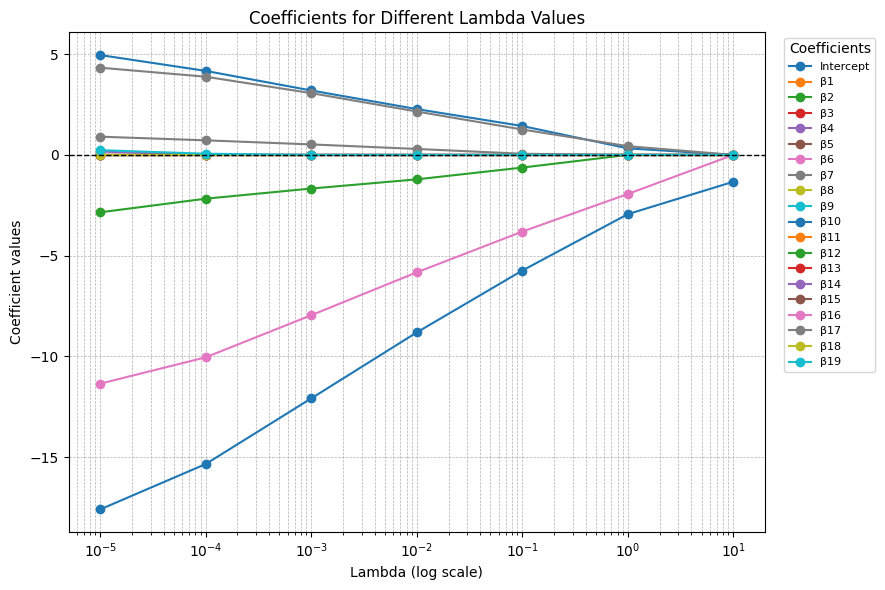

In [19]:
model.plot_coeff()

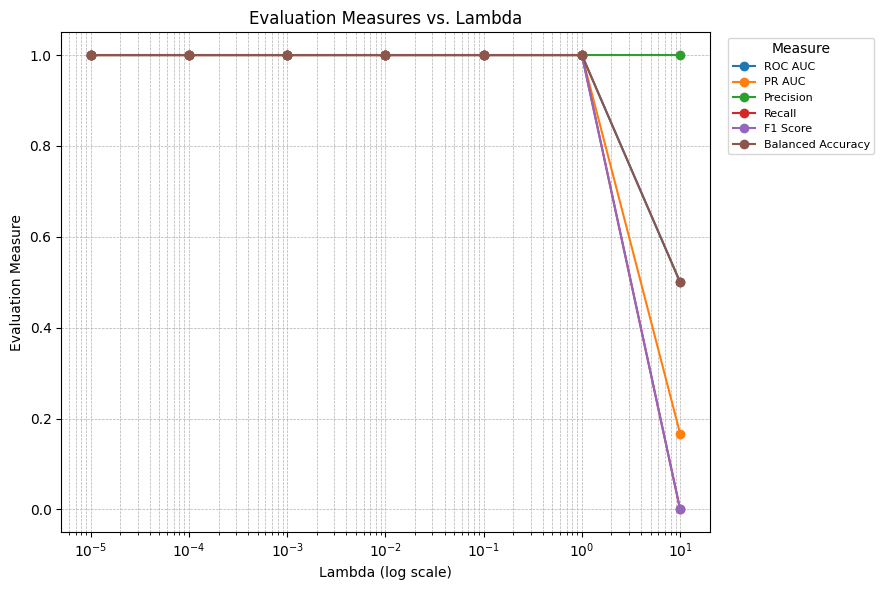

In [20]:
model.validate_and_plot_all(X_test, y_test)

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot: title={'center': '(Liver) Performance Comparison: LogRegCCD vs sklearn'}, xlabel='Metrics', ylabel='Score'>)

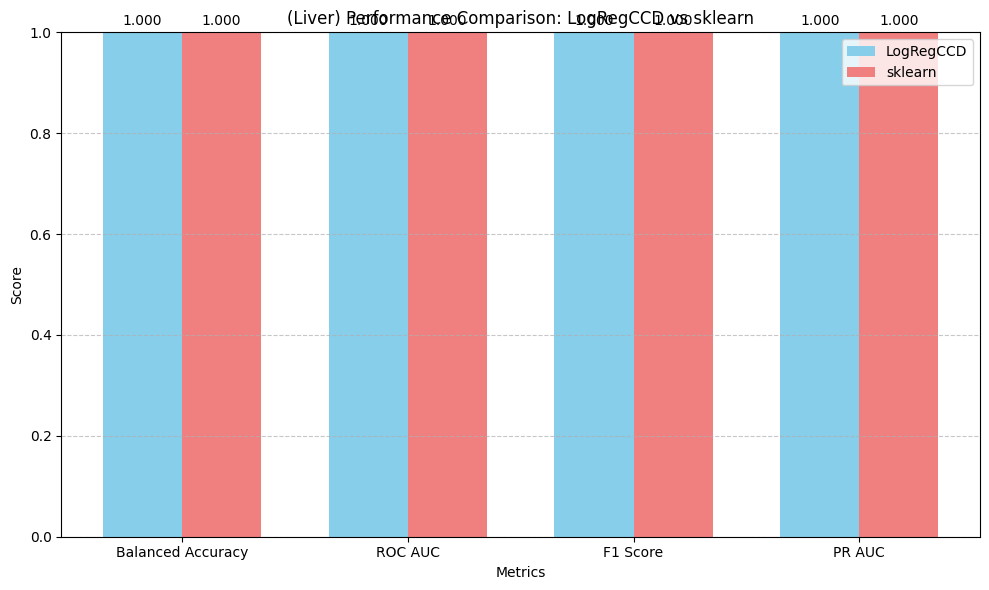

In [21]:
model.results = model.results.loc[model.results['lambda'] == 1]

y_pred = sklearn_model.predict(X_test)
y_pred_proba = sklearn_model.predict_proba(X_test)[:, 1]

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred_proba)

ccd_metrics = {
    'Balanced Accuracy': model.results['balanced_accuracy'].values[0],
    'ROC AUC': model.results['roc_auc'].values[0],
    'F1 Score': model.results['f1'].values[0],
    'PR AUC': model.results['pr_auc'].values[0]
}

sklearn_metrics = {
    'Balanced Accuracy': balanced_accuracy,
    'ROC AUC': roc_auc,
    'F1 Score': f1,
    'PR AUC': pr_auc
}

compare_model_metrics(ccd_metrics, sklearn_metrics, title='(Liver) Performance Comparison: LogRegCCD vs sklearn')

# Diabetes

In [22]:
data = pd.read_csv('data/diabetes_preprocessed.csv')
display(data.head())

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data['y'], test_size=0.2, random_state=2871, stratify=data['y'])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lambda_vals = np.logspace(-5, 1, 7)

# Fit the model
model = LogRegCCD(max_iter=100, lambda_vals=lambda_vals)
model.fit(X_train, y_train)
model.validate_all(X_test, y_test)

# Compare with sklearn's LogisticRegression
sklearn_model = LogisticRegression(max_iter=100, penalty='l1', solver='liblinear')
sklearn_model.fit(X_train, y_train)

,y,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,new_col_0,...,new_col_390,new_col_391,new_col_392,new_col_393,new_col_394,new_col_395,new_col_396,new_col_397,new_col_398,new_col_399
0,1,6,148,72,35,0,33.6,0.627,50,0.340833,...,0.605464,0.442540,0.309339,0.526637,0.184681,0.367610,0.106502,0.326978,0.104561,0.953774
1,0,1,85,66,29,0,26.6,0.351,31,0.088557,...,0.621209,0.386958,0.389677,0.679043,0.823579,0.161937,0.579753,0.031980,0.860575,0.221989
2,1,8,183,64,0,0,23.3,0.672,32,0.322028,...,0.296675,0.698367,0.223821,0.937580,0.388751,0.729313,0.948001,0.458639,0.097168,0.449457
3,0,1,89,66,23,94,28.1,0.167,21,0.030550,...,0.812752,0.564928,0.325214,0.071022,0.766874,0.489971,0.992012,0.278171,0.659883,0.770655
4,1,0,137,40,35,168,43.1,2.288,33,0.953731,...,0.846783,0.749844,0.017282,0.282315,0.074020,0.581271,0.621787,0.211920,0.343229,0.468963


LogisticRegression(penalty='l1', solver='liblinear')

In [25]:
# model.plot_coeff()

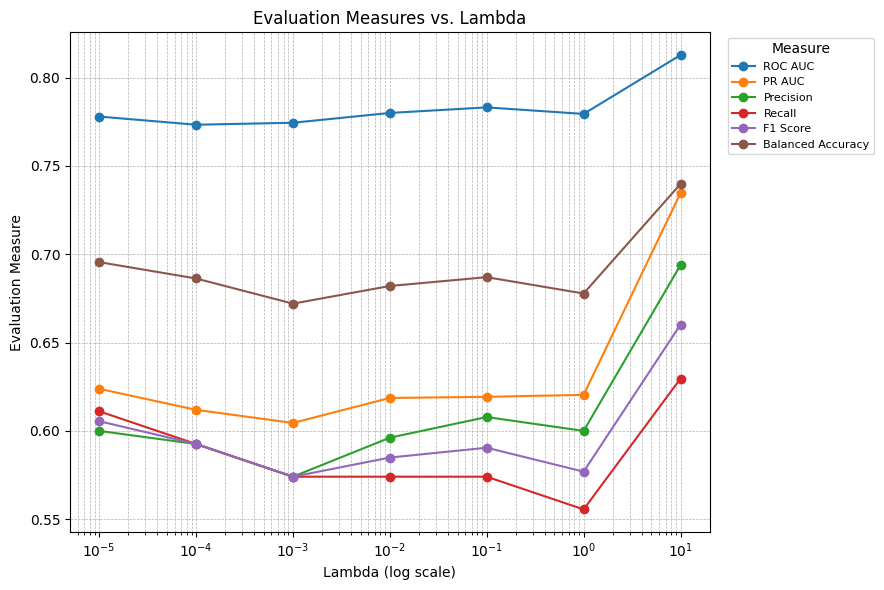

In [24]:
model.validate_and_plot_all(X_test, y_test)

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot: title={'center': '(Diabetes) Performance Comparison: LogRegCCD vs sklearn'}, xlabel='Metrics', ylabel='Score'>)

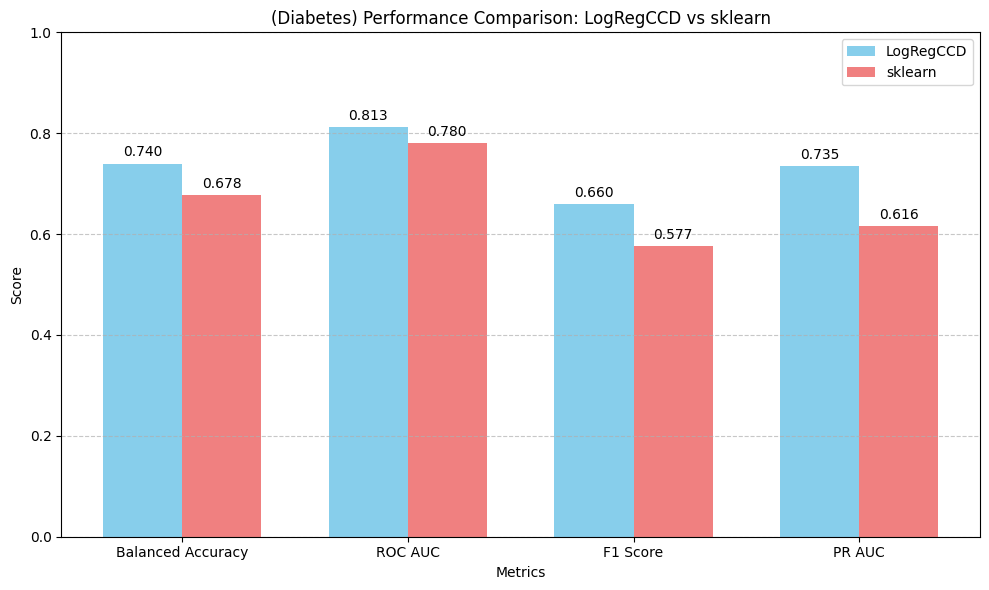

In [27]:
model.results = model.results.loc[model.results['lambda'] == 10]

y_pred = sklearn_model.predict(X_test)
y_pred_proba = sklearn_model.predict_proba(X_test)[:, 1]

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred_proba)

ccd_metrics = {
    'Balanced Accuracy': model.results['balanced_accuracy'].values[0],
    'ROC AUC': model.results['roc_auc'].values[0],
    'F1 Score': model.results['f1'].values[0],
    'PR AUC': model.results['pr_auc'].values[0]
}

sklearn_metrics = {
    'Balanced Accuracy': balanced_accuracy,
    'ROC AUC': roc_auc,
    'F1 Score': f1,
    'PR AUC': pr_auc
}

compare_model_metrics(ccd_metrics, sklearn_metrics, title='(Diabetes) Performance Comparison: LogRegCCD vs sklearn')

# Academic

In [33]:
data = pd.read_csv('data/academic_preprocessed.csv')
display(data.head())

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data['y'], test_size=0.2, random_state=2871, stratify=data['y'])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lambda_vals = np.logspace(-5, 1, 7)

# Fit the model
model = LogRegCCD(max_iter=100, lambda_vals=lambda_vals)
model.fit(X_train, y_train)
model.validate_all(X_test, y_test)

# Compare with sklearn's LogisticRegression
sklearn_model = LogisticRegression(max_iter=100, penalty='l1', solver='liblinear')
sklearn_model.fit(X_train, y_train)

,y,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,new_col_2490,new_col_2491,new_col_2492,new_col_2493,new_col_2494,new_col_2495,new_col_2496,new_col_2497,new_col_2498,new_col_2499
0,0,1,17,5,171,1,1,122.0,1,19,...,0.660567,0.917154,0.882594,0.099454,0.664859,0.596739,0.455642,0.935194,0.815299,0.133321
1,1,1,15,1,9254,1,1,160.0,1,1,...,0.689353,0.597854,0.733758,0.441986,0.982406,0.271615,0.035050,0.123686,0.632839,0.724050
2,0,1,1,5,9070,1,1,122.0,1,37,...,0.099758,0.714213,0.909167,0.405215,0.116038,0.893817,0.033694,0.070869,0.441466,0.008727
3,1,1,17,2,9773,1,1,122.0,1,38,...,0.779934,0.998329,0.090729,0.200501,0.832616,0.879222,0.922194,0.865133,0.834751,0.609471
4,1,2,39,1,8014,0,1,100.0,1,37,...,0.718455,0.974730,0.558163,0.828522,0.988131,0.416228,0.232813,0.300878,0.938593,0.622352


LogisticRegression(penalty='l1', solver='liblinear')

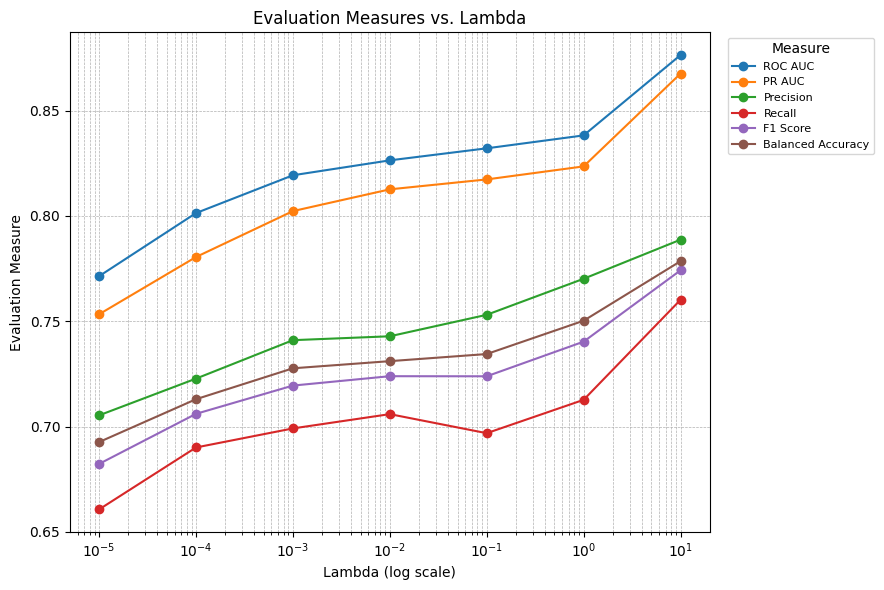

In [29]:
model.validate_and_plot_all(X_test, y_test)

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot: title={'center': '(Academic) Performance Comparison: LogRegCCD vs sklearn'}, xlabel='Metrics', ylabel='Score'>)

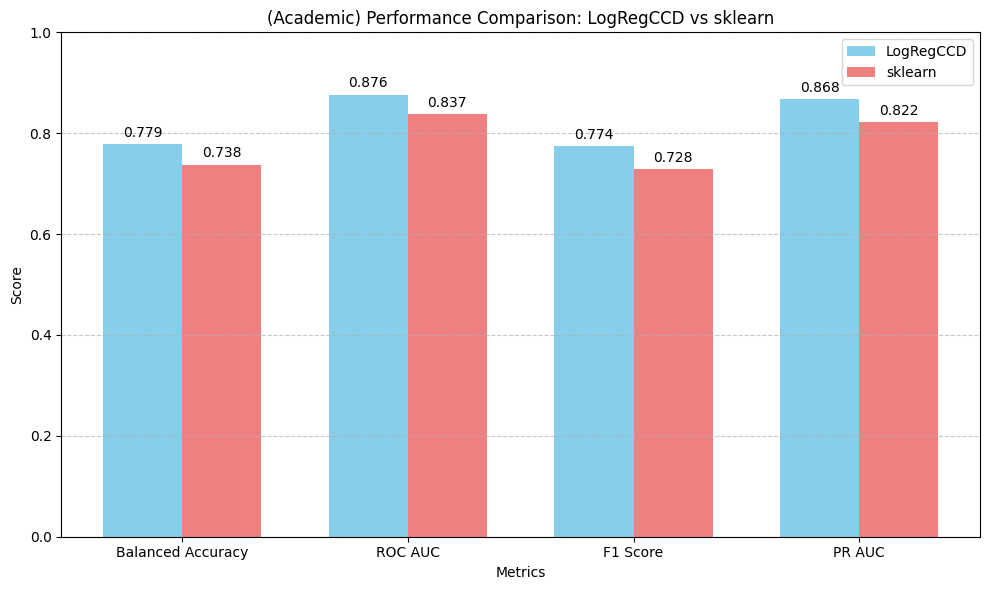

In [34]:
model.results = model.results.loc[model.results['lambda'] == 10]

y_pred = sklearn_model.predict(X_test)
y_pred_proba = sklearn_model.predict_proba(X_test)[:, 1]

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred_proba)

ccd_metrics = {
    'Balanced Accuracy': model.results['balanced_accuracy'].values[0],
    'ROC AUC': model.results['roc_auc'].values[0],
    'F1 Score': model.results['f1'].values[0],
    'PR AUC': model.results['pr_auc'].values[0]
}

sklearn_metrics = {
    'Balanced Accuracy': balanced_accuracy,
    'ROC AUC': roc_auc,
    'F1 Score': f1,
    'PR AUC': pr_auc
}

compare_model_metrics(ccd_metrics, sklearn_metrics, title='(Academic) Performance Comparison: LogRegCCD vs sklearn')